## Model for predicting house prices
This notebook documents the process of building, training, and evaluating a machine learning model for predicting house prices using various input features.

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

In [247]:
df = pd.read_csv('../Data/cleaned_train.csv')
df['SalePrice_Log'] = np.log(df['SalePrice'])

In [248]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).drop(['SalePrice', 'SalePrice_Log'], axis=1).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

In [249]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [250]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features), 
    ('cat', categorical_transformer, categorical_features)    
])


In [251]:
X = df.drop(['SalePrice', 'SalePrice_Log'], axis=1)
y = df['SalePrice_Log']

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [253]:
models = {
    'Ridge Regression'  : Ridge(alpha=10),
    'Lasso Regression'  : Lasso(alpha=0.01),
    'Random Forest'     : RandomForestRegressor(n_estimators=100, random_state=42),
    'XG Boost'          : XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

}

In [ ]:
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred_log = pipeline.predict(X_test)
    
    # Clamp prediksi ke 700
    y_pred_log = np.clip(y_pred_log, a_min=None, a_max=700)

    # Transform ke nilai aslinya
    y_pred = np.expm1(y_pred_log)
    y_test_actual = np.expm1(y_test)
    
    # Metrics
    rmse = mean_squared_error(y_test_actual, y_pred, squared=False)
    r2_train = pipeline.score(X_train, y_train)
    r2_test = r2_score(y_test_actual, y_pred)
    
    print(f"{name} have RMSE: {rmse:.2f}, R2 Train: {r2_train:.4f}, R2 Test: {r2_test:.4f}")


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Ridge Regression have RMSE: 24883.30, R2 Train: 0.9231, R2 Test: 0.9193
Lasso Regression have RMSE: 31470.64, R2 Train: 0.8550, R2 Test: 0.8709


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest have RMSE: 29522.13, R2 Train: 0.9812, R2 Test: 0.8864
XG Boost have RMSE: 26821.94, R2 Train: 0.9948, R2 Test: 0.9062


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [285]:
pipeline_Ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=10))
])

In [286]:
pipeline_Ridge.fit(X_train, y_train)
y_pred_rid = pipeline_Ridge.predict(X_test)

In [287]:
y_pred = np.expm1(y_pred_rid)
y_test_actual = np.expm1(y_test)

rmse = mean_squared_error(y_test_actual, y_pred, squared=False)
r2_train = pipeline_Ridge.score(X_train, y_train)
r2_test = r2_score(y_test_actual, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2 Train: {r2_train:.4f}")
print(f"R2 Test: {r2_test:.4f}")

RMSE: 24883.30
R2 Train: 0.9231
R2 Test: 0.9193


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


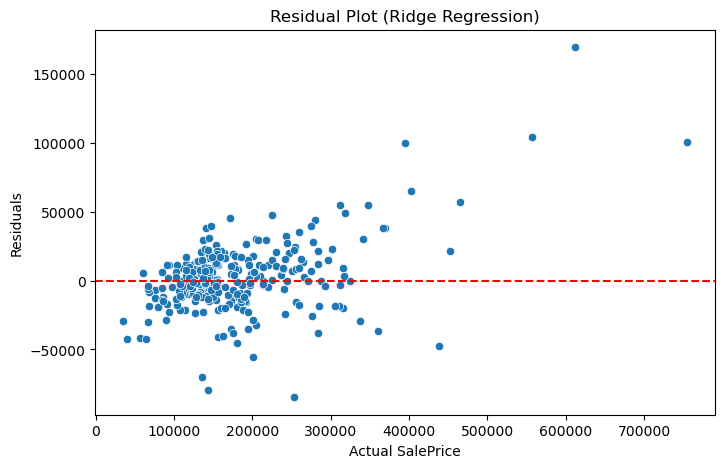

In [269]:
residuals = y_test_actual - y_pred

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test_actual, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot (Ridge Regression)')
plt.show()

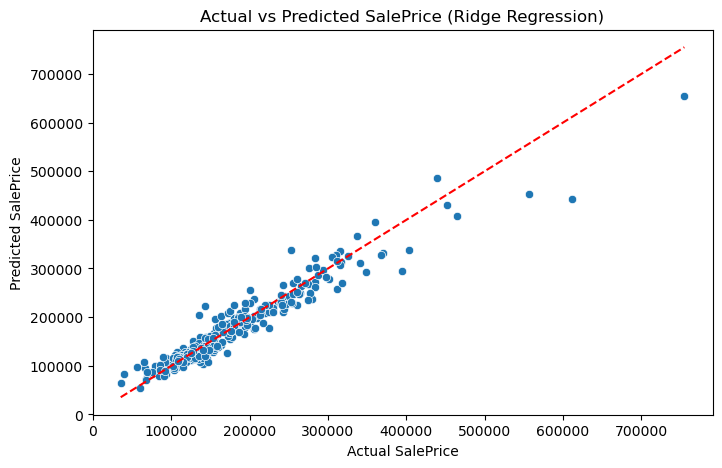

In [270]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test_actual, y=y_pred)
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()], 'r--')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice (Ridge Regression)')
plt.show()
